In [1]:
   import pandas as pd

   # Load the dataset from the specified path
   file_path = r"C:\Users\HAKIMHAMRI\Documents\UMK KAMPUS KOTA\TAHUN 2 SEM 4\AI 2\Project 1\LSTM-Project\FBMKLCI.csv"
   df = pd.read_csv(file_path)

   # Display the first few rows of the dataframe
   print(df.head())
   

         time       open       high        low      close  MA  Volume
0  1982-01-01  378.76001  387.06000  220.74001  291.44000 NaN     NaN
1  1983-01-03  288.60999  421.29999  284.76999  401.60001 NaN     NaN
2  1984-01-02  408.95001  426.79001  289.32001  303.54999 NaN     NaN
3  1985-01-01  298.70999  320.47000  217.63000  233.47000 NaN     NaN
4  1986-01-01  219.75000  272.03000  169.83000  252.42999 NaN     NaN


              open         high          low        close   MA  Volume
count    43.000000    43.000000    43.000000    43.000000  0.0     0.0
mean   1008.402789  1148.495573   880.915116  1038.761393  NaN     NaN
std     526.143043   519.549416   495.767135   525.206447  NaN     NaN
min     219.750000   272.030000   169.830000   233.470000  NaN     NaN
25%     574.410005   701.244995   480.015000   583.179990  NaN     NaN
50%     901.299990  1242.000000   836.510010   971.210020  NaN     NaN
75%    1524.065000  1626.614950  1370.989950  1549.130000  NaN     NaN
max    1865.730000  1896.230000  1671.819900  1866.960000  NaN     NaN


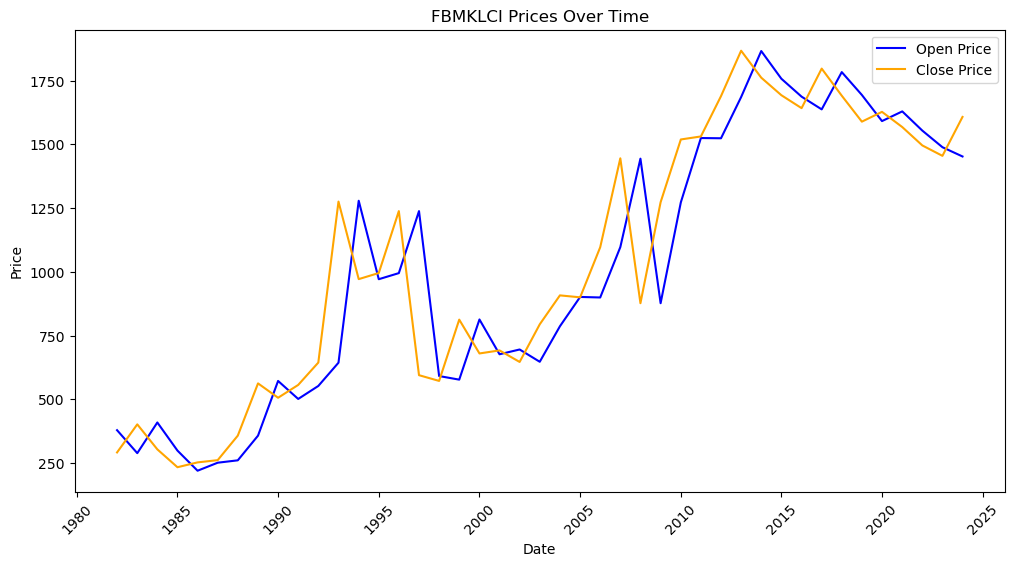

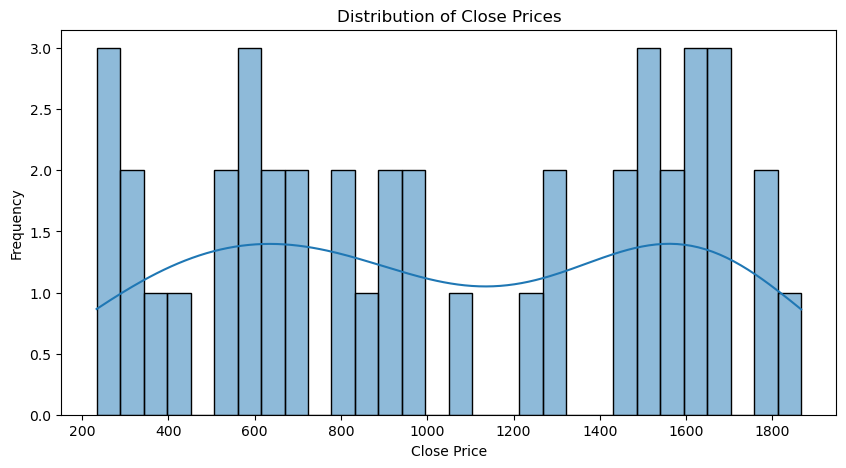

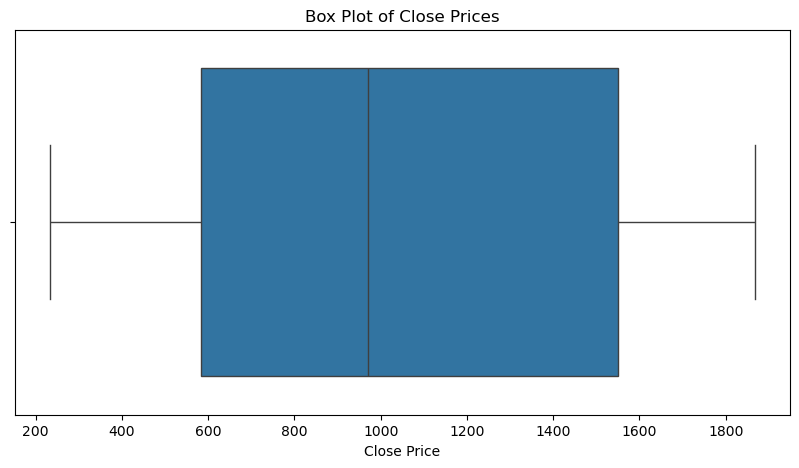

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path
file_path = r"C:\Users\HAKIMHAMRI\Documents\UMK KAMPUS KOTA\TAHUN 2 SEM 4\AI 2\Project 1\LSTM-Project\FBMKLCI.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Descriptive statistics
print(df.describe())

# Time Series Plot of 'open', 'high', 'low', and 'close' prices
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['time']), df['open'], label='Open Price', color='blue')
plt.plot(pd.to_datetime(df['time']), df['close'], label='Close Price', color='orange')
plt.title('FBMKLCI Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Histogram of 'close' prices
plt.figure(figsize=(10, 5))
sns.histplot(df['close'], bins=30, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['close'])
plt.title('Box Plot of Close Prices')
plt.xlabel('Close Price')
plt.show()


In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

class CustomModel(tf.keras.Model):
    def __init__(self, *args, **kwargs):
        super(CustomModel, self).__init__(*args, **kwargs)
        # Define the layers
        self.dense_1 = Dense(2, activation='relu', name="test_in")  # Input layer with ReLU activation
        self.dense_2 = Dense(1, name="test_out")  # Output layer

    # Call function used to make predictions
    @tf.function
    def call(self, inputs):
        x = self.dense_1(inputs)  # Pass inputs through the first dense layer
        return self.dense_2(x)    # Pass the output through the second dense layer

    # Train function called from Rust which uses the keras model innate train_step function
    @tf.function
    def training(self, train_data):
        # Unpack the training data
        inputs, targets = train_data
        with tf.GradientTape() as tape:
            predictions = self.call(inputs)  # Forward pass
            loss = self.compiled_loss(targets, predictions)  # Calculate loss using the compiled loss function
        # Calculate gradients and update weights
        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        return loss



In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

# Define the custom model class
class CustomModel(tf.keras.Model):
    def __init__(self, *args, **kwargs):
        super(CustomModel, self).__init__(*args, **kwargs)
        # Define the layers
        self.dense_1 = Dense(2, activation='relu', name="test_in")  # Input layer with ReLU activation
        self.dense_2 = Dense(1, name="test_out")  # Output layer

    # Call function used to make predictions
    @tf.function
    def call(self, inputs):
        x = self.dense_1(inputs)  # Pass inputs through the first dense layer
        return self.dense_2(x)    # Pass the output through the second dense layer

    # Train function called from Rust which uses the keras model innate train_step function
    @tf.function
    def training(self, train_data):
        # Unpack the training data
        inputs, targets = train_data
        with tf.GradientTape() as tape:
            predictions = self.call(inputs)  # Forward pass
            loss = self.compiled_loss(targets, predictions)  # Calculate loss using the compiled loss function
        # Calculate gradients and update weights
        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        return loss

# Create model instance
test_model = CustomModel()

# Compile model
test_model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Example data preparation (dummy data for demonstration)
import numpy as np

# Generate some dummy training data
train_inputs = np.random.rand(100, 2)  # 100 samples, 2 features
train_targets = np.random.rand(100, 1)  # 100 target values

# Example training loop
num_epochs = 10
for epoch in range(num_epochs):
    loss = test_model.training((train_inputs, train_targets))
    print(f'Epoch {epoch + 1}, Loss: {loss.numpy()}')


Epoch 1, Loss: 0.24725493788719177
Epoch 2, Loss: 0.23901371657848358
Epoch 3, Loss: 0.23128658533096313
Epoch 4, Loss: 0.22399559617042542
Epoch 5, Loss: 0.2172446995973587
Epoch 6, Loss: 0.2108616679906845
Epoch 7, Loss: 0.20496287941932678
Epoch 8, Loss: 0.19951923191547394
Epoch 9, Loss: 0.19447994232177734
Epoch 10, Loss: 0.18981388211250305


In [12]:
# Get concrete function for the call method
pred_output = test_model.call.get_concrete_function(
    tf.TensorSpec(shape=[1, 2], dtype=tf.float32, name='inputs')
)

# Get concrete function for the training method
train_output = test_model.training.get_concrete_function(
    (
        tf.TensorSpec(shape=[1, 2], dtype=tf.float32, name="training_input"),
        tf.TensorSpec(shape=[1, 1], dtype=tf.float32, name="training_target")
    )
)


In [14]:
# Saving the model, explicitly adding the concrete functions as signatures
test_model.save(
    'custom_model', 
    save_format='tf', 
    signatures={'train': train_output, 'pred': pred_output}
)


OSError: SavedModel file does not exist at: custom_model\{saved_model.pbtxt|saved_model.pb}